In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Veri setinin yüklenmesi

In [2]:
df = pd.read_csv("/workspace/DeepLearningFundamentals/Dokumanlar/02_MachineLearning/data/diabetes.csv")

#### Veri Setini Keşfedelim

head and tail

info

describe

#### Boş verilerin temizlenmesi (Handling Missing Data)

boş verilerin tespit edilmesi

In [3]:
# BMI
columnName = "BMI"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# BloodPressure
columnName = "BloodPressure"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# Insulin
columnName = "Insulin"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# Glucose
columnName = "Glucose"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)
# SkinThickness
columnName = "SkinThickness"
df[columnName] = df[columnName].replace(value=df[columnName].mean(),to_replace=0)

boşverilerin temizlenmesi (Boş veri Yok ise boş geçilebilir)

#### Kategorik verilerin dönüştürülmesi (Encoding Data)

Veri Tiplerinin Tespiti

Verilerin Dönüştürülmesi (Yok ise boş geçilebilir)

#### Aykırı Verilerin Tespiti


Verilerin dağılım grafiği ile tespit edilmesi

Verilerin IQR yöntemi ile tespit edilip kaldırılması

In [4]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    return df[~((df<Lower_tail) | (df>Upper_tail)).any(axis=1)]
    # df2 = df[~df.isin("aykırıdeğerler")].dropna()
df_clean = iqr_outliers(df)

#### Etiket Verisi varsa veri setinden ayrılması

In [5]:
y= df_clean["Outcome"].values
X= df_clean.drop("Outcome",axis=1)

#### Eğitim ve Test Setinin Birbirinden Ayrılması

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

#### Veri Ölçeklendirme işleminin gerçekleştirilmesi

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled =  sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(5,shuffle=True)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled,y_train)
y_preds = model.predict(X_test_scaled)
model.score(X_test_scaled,y_test)

0.7338709677419355

In [13]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [15]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
kfold = KFold(n_splits=5,shuffle=True)
model = KNeighborsClassifier()
cross_val_score(model,X_train_scaled,y_train,cv=kfold)

array([0.79      , 0.80808081, 0.71717172, 0.63636364, 0.73737374])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [28]:
seed = 7
result = []
names = []
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('LSVC',LinearSVC()))
models.append(('RFC',RandomForestClassifier()))
models.append(('DTR',DecisionTreeRegressor()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVC', SVC()),
 ('LSVC', LinearSVC()),
 ('RFC', RandomForestClassifier()),
 ('DTR', DecisionTreeRegressor())]

In [29]:
import warnings
warnings.filterwarnings("ignore")
for name,model in models:
    kfold = KFold(n_splits=5,random_state=7,shuffle=True)
    cv_results = cross_val_score(model,X_train_scaled,y_train,cv=kfold,scoring="accuracy")
    result.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean()} {cv_results.std()}"
    print(msg)

LR 0.7722020202020202 0.021462723621538952
KNN 0.7581616161616161 0.04069774061560644
NB 0.7661414141414141 0.007088117094008368
SVC 0.7541212121212121 0.03848982708590872
LSVC 0.7762626262626262 0.02278891752056259
RFC 0.7501212121212121 0.039647688329568276
DTR 0.6773939393939393 0.04349229866140408


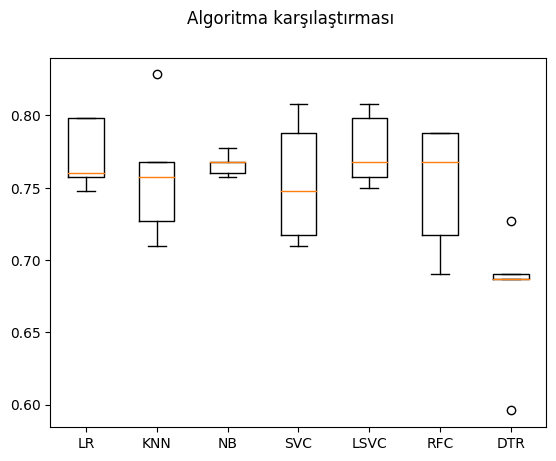

In [30]:
fig = plt.figure()
fig.suptitle("Algoritma karşılaştırması")
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()